## [Computational Social Science] Project 5: Natural Language Processing

In this project, you will use natural language processing techniques to explore a dataset containing tweets from members of the 116th United States Congress that met from January 3, 2019 to January 2, 2021. The dataset has also been cleaned to contain information about each legislator. Concretely, you will do the following:

* Preprocess the text of legislators' tweets
* Conduct Exploratory Data Analysis of the text
* Use sentiment analysis to explore differences between legislators' tweets
* Featurize text with manual feature engineering, frequency-based, and vector-based techniques
* Predict legislators' political parties and whether they are a Senator or Representative

You will explore two questions that relate to two central findings in political science and examine how they relate to the text of legislators' tweets. First, political scientists have argued that U.S. politics is currently highly polarized relative to other periods in American history, but also that the polarization is asymmetric. Historically, there were several conservative Democrats (i.e. "blue dog Democrats") and liberal Republicans (i.e. "Rockefeller Republicans"), as measured by popular measurement tools like [DW-NOMINATE](https://en.wikipedia.org/wiki/NOMINATE_(scaling_method)#:~:text=DW\%2DNOMINATE\%20scores\%20have\%20been,in\%20the\%20liberal\%2Dconservative\%20scale.). However, in the last few years, there are few if any examples of any Democrat in Congress being further to the right than any Republican and vice versa. At the same time, scholars have argued that this polarization is mostly a function of the Republican party moving further right than the Democratic party has moved left. **Does this sort of asymmetric polarization show up in how politicians communicate to their constituents through tweets?**

Second, the U.S. Congress is a bicameral legislature, and there has long been debate about partisanship in the Senate versus the House. The House of Representatives is apportioned by population and all members serve two year terms. In the Senate, each state receives two Senators and each Senator serves a term of six years. For a variety of reasons (smaller chamber size, more insulation from the voters, rules and norms like the filibuster, etc.), the Senate has been argued to be the "cooling saucer" of Congress in that it is more bipartisan and moderate than the House. **Does the theory that the Senate is more moderate have support in Senators' tweets?**

**Note**: See the project handout for more details on caveats and the data dictionary.

In [51]:
# pandas and numpy
import pandas as pd
import numpy as numpy

# punctuation, stop words and English language model
from string import punctuation
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_web_sm
nlp = en_core_web_sm.load()

# textblob
from textblob import TextBlob

# countvectorizer, tfidfvectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# gensim
import gensim
from gensim import models

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
#wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression

In [25]:
# load data 
# ----------
congress_tweets = pd.read_csv("/Users/alexadia/Downloads/data/116th Congressional Tweets and Demographics.csv")
# fill in this line of code with a sufficient number of tweets, depending on your computational resources
#choosing 10k
random.seed(64)
congress_tweets = congress_tweets.sample(10000)
congress_tweets.head(20)

,tweet_id,screen_name,datetime,text,name_wikipedia,position,joined_congress_date,birthday,gender,state,district_number,party,trump_2016_state_share,clinton_2016_state_share,obama_2012_state_share,romney_2012_state_share
511498,1.157790e+18,RepAndyKimNJ,2019-08-03T18:54:32-04:00,Important words worth your time https://twitte...,Andy Kim,Rep,3-Jan-19,7/12/1982,M,NJ,3,Democrat,"1,601,933","2,148,278","2,125,101","1,477,568"
742985,1.139660e+18,RepCohen,2019-06-14T18:34:28-04:00,"I’ve been a cosponsor of #HR40, originally int...",Steve Cohen,Rep,3-Jan-07,5/24/1949,M,TN,9,Democrat,"1,522,925","870,695","960,709","1,462,330"
564514,1.149020e+18,RepYvetteClarke,2019-07-10T14:37:53-04:00,🤡 \n\nRESIGN. \n\n#AcostaMustGo http://pbs.tw...,Yvette Clarke,Rep,3-Jan-13,11/21/1964,F,NY,9,Democrat,"2,819,533","4,556,118","4,485,741","2,490,431"
446623,1.245360e+18,BettyMcCollum04,2020-04-01T10:43:00-04:00,The House passed H.R. 312 last May reaffirming...,Betty McCollum,Rep,3-Jan-01,7/12/1954,F,MN,4,Democrat,"1,322,951","1,367,716","1,546,167","1,320,225"
181490,1.246130e+18,SenBlumenthal,2020-04-03T13:27:53-04:00,"States &amp; cities are doing what they can, b...",Richard Blumenthal,Sen,3-Jan-11,2/13/1946,M,CT,Senate,Democrat,"673,215","897,572","905,083","634,892"
206749,1.125470e+18,RepShalala,2019-05-06T14:55:33-04:00,Go Canes! https://twitter.com/canesfootball/st...,Donna Shalala,Rep,3-Jan-19,2/14/1941,F,FL,27,Democrat,"4,617,886","4,504,975","4,237,756","4,163,447"
863609,1.142130e+18,RepSpanberger,2019-06-21T14:08:49-04:00,Agreed! The stories I've heard from #VA07 cons...,Abigail Spanberger,Rep,3-Jan-19,8/7/1979,F,VA,7,Democrat,"1,769,443","1,981,473","1,971,820","1,822,522"
107593,1.224480e+18,BradSherman,2020-02-03T19:06:25-05:00,China condemns the United States for severe li...,Brad Sherman,Rep,3-Jan-97,10/24/1954,M,CA,30,Democrat,"4,483,814","8,753,792","7,854,285","4,839,958"
597754,1.286760e+18,RepJerryNadler,2020-07-24T16:42:33-04:00,A GAO report found that 2/3 of America's publi...,Jerrold Nadler,Rep,3-Nov-92,6/13/1947,M,NY,10,Democrat,"2,819,533","4,556,118","4,485,741","2,490,431"
643257,1.245150e+18,RepBalderson,2020-03-31T20:41:29-04:00,@fema @SBA_Columbus Thank you again to everyon...,Troy Balderson,Rep,5-Sep-18,1/16/1962,M,OH,12,Republican,"2,841,005","2,394,164","2,827,709","2,661,437"


## Preprocessing

The first step in working with text data is to preprocess it. Make sure you do the following:

* Remove punctuation and stop words. The `rem_punc_stop()` function we used in lab is provided to you but you should feel free to edit it as necessary for other steps
* Remove tokens that occur frequently in tweets, but may not be helpful for downstream classification. For instance, many tweets contain a flag for retweeting, or share a URL 

As you search online, you might run into solutions that rely on regular expressions. You are free to use these, but you should also be able to preprocess using the techniques we covered in lab. Specifically, we encourage you to use spaCy's token attributes and string methods to do some of this text preprocessing.

In [26]:
def rem_punc_stop(text):
    stop_words = STOP_WORDS
    punc = set(punctuation)
    
    punc_free = "".join([ch for ch in text if ch not in punc])
    
    doc = nlp(punc_free)
    
    spacy_words = [token.text for token in doc]
    
    spacy_words = [word for word in spacy_words if not word.startswith('http')]
    
    spacy_words = [word for word in spacy_words if not word.startswith('RT')]  #Remove retweet flags
    
    common_tokens = ['RT', 'rt', 'QT', 'qt', 'via', 'amp', '"']  # some stuff in the word cloud I didn't want
    spacy_words = [word for word in spacy_words if word.lower() not in common_tokens]  #Remove common tokens
    
    no_punc = [word for word in spacy_words if word not in stop_words]
    
    return no_punc

Now I tokenize

In [27]:
# now apply the function to all the columns in our dataframe
# ----------
congress_tweets['tokens'] = congress_tweets['text'].map(lambda x: rem_punc_stop(x)) # can use apply here 
congress_tweets['tokens'] # visualize

511498    [Important, words, worth, time, RepEscobar, To...
742985    [I, cosponsor, HR40, originally, introduced, R...
564514               [🤡, \n\n, RESIGN,  \n\n, AcostaMustGo]
446623    [The, House, passed, HR, 312, May, reaffirming...
181490    [States, cities, President, needs, weight, gov...
                                ...                        
680510    [Page, 29, reminds, ONCE, AGAIN, SUPREME, COUR...
324183    [On, We, d, RepublicanStudy, release, package,...
594004    [When, impeached, President, Trump, warned, gr...
855170    [RepDonBeyer, 800000, rankandfile, federal, em...
201413    [The, ball, Kim, Jong, Un, court, right, He, c...
Name: tokens, Length: 10000, dtype: object

## Exploratory Data Analysis

Use two of the techniques we covered in lab (or other techniques outside of lab!) to explore the text of the tweets. You should construct these visualizations with an eye toward the eventual classification tasks: (1) predicting the legislator's political party based on the text of their tweet, and (2) predicting whether the legislator is a Senator or Representative. As a reminder, in lab we covered word frequencies, word clouds, word/character counts, scattertext, and topic modeling as possible exploration tools. 

### EDA 1: Word Cloud

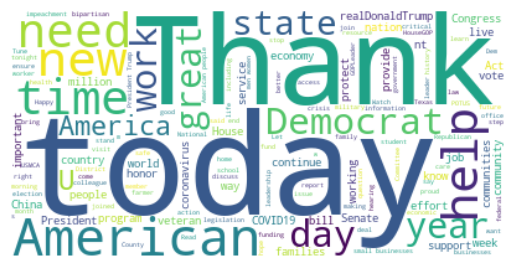

In [28]:
# Republican tweets
repub_tweets = congress_tweets[congress_tweets['party'] == 'Republican'].copy()

repub_text = ' '.join(repub_tweets['tokens'].map(lambda text: ' '.join(text)))

# create WordCloud visualization using the "text" object 
repub_wordcloud = WordCloud(background_color = "white",  # set background color to white
                      random_state=41              # set random state to ensure same word cloud each time
                      ).generate(repub_text)             # change the background color


# plot 
plt.imshow(repub_wordcloud,                  # specify wordcloud
           interpolation = 'bilinear') # specifies how the words are displayed
plt.axis('off')                        # turn off axes
plt.show()                             # show the plot 

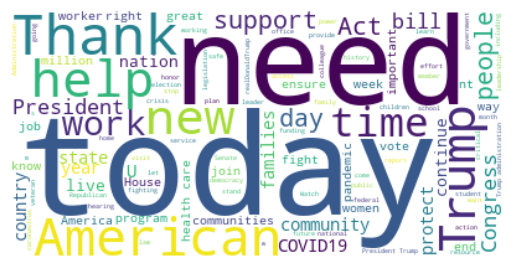

In [29]:
# Democrat tweets
demo_tweets = congress_tweets[congress_tweets['party'] == 'Democrat'].copy()

demo_text = ' '.join(demo_tweets['tokens'].map(lambda text: ' '.join(text)))

# create WordCloud visualization using the "text" object 
demo_wordcloud = WordCloud(background_color = "white",  # set background color to white
                      random_state=41              # set random state to ensure same word cloud each time
                      ).generate(demo_text)             # change the background color


# plot 
plt.imshow(demo_wordcloud,                  # specify wordcloud
           interpolation = 'bilinear') # specifies how the words are displayed
plt.axis('off')                        # turn off axes
plt.show()                             # show the plot 

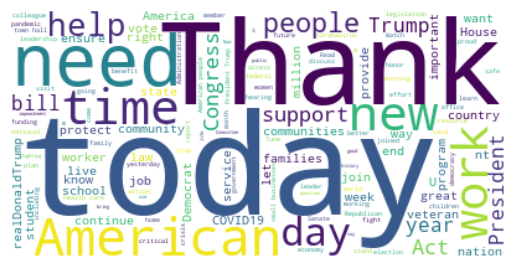

In [30]:
# Representative tweets
rep_tweets = congress_tweets[congress_tweets['position'] == 'Rep'].copy()

rep_text = ' '.join(rep_tweets['tokens'].map(lambda text: ' '.join(text)))

# create WordCloud visualization using the "text" object 
rep_wordcloud = WordCloud(background_color = "white",  # set background color to white
                      random_state=41              # set random state to ensure same word cloud each time
                      ).generate(rep_text)             # change the background color


# plot 
plt.imshow(rep_wordcloud,                  # specify wordcloud
           interpolation = 'bilinear') # specifies how the words are displayed
plt.axis('off')                        # turn off axes
plt.show()                             # show the plot

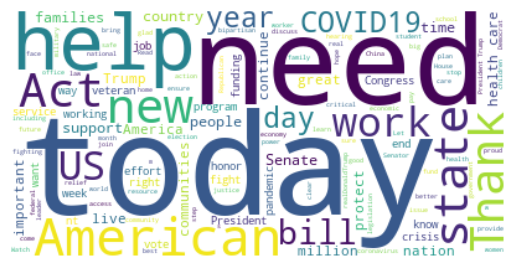

In [31]:
sen_tweets = congress_tweets[congress_tweets['position'] == 'Sen'].copy()

sen_text = ' '.join(sen_tweets['tokens'].map(lambda text: ' '.join(text)))

# create WordCloud visualization using the "text" object 
sen_wordcloud = WordCloud(background_color = "white",  # set background color to white
                      random_state=41              # set random state to ensure same word cloud each time
                      ).generate(sen_text)             # change the background color


# plot 
plt.imshow(sen_wordcloud,                  # specify wordcloud
           interpolation = 'bilinear') # specifies how the words are displayed
plt.axis('off')                        # turn off axes
plt.show()                             # show the plot

### EDA 2: Word Counts

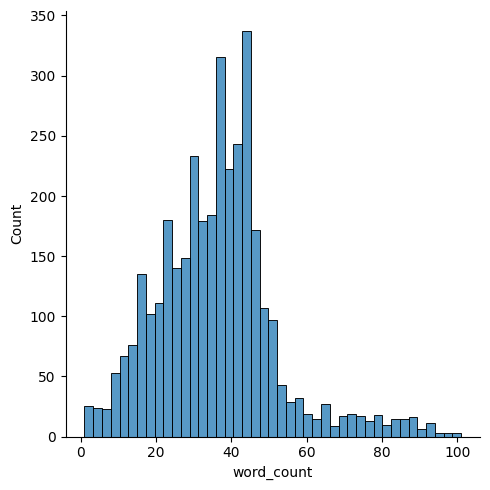

In [32]:
#Republican tweets
repub_tweets['word_count'] = repub_tweets['text'].apply(lambda x: len(str(x).split()))
sns.displot(repub_tweets,           # specify data 
            x="word_count") # x-axis feature
plt.show()

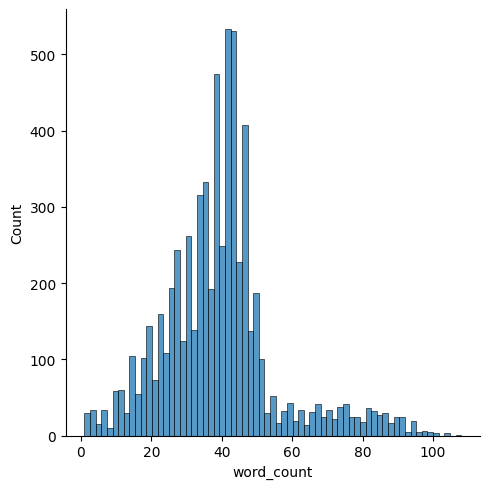

In [33]:
#Democrat tweets
demo_tweets['word_count'] = demo_tweets['text'].apply(lambda x: len(str(x).split()))
sns.displot(demo_tweets,           # specify data 
            x="word_count") # x-axis feature
plt.show()

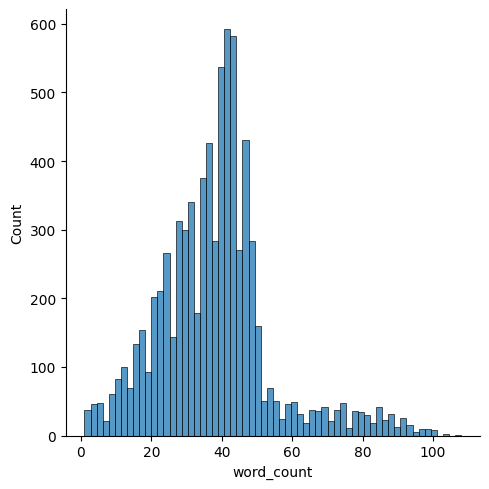

In [34]:
#Rep tweets
rep_tweets['word_count'] = rep_tweets['text'].apply(lambda x: len(str(x).split()))
sns.displot(rep_tweets,           # specify data 
            x="word_count") # x-axis feature
plt.show()

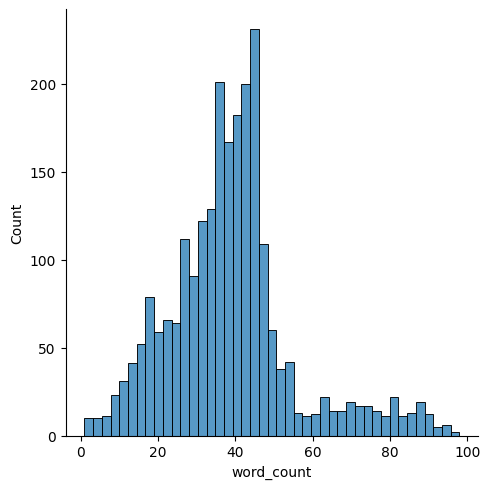

In [35]:
#Sen tweets
sen_tweets['word_count'] = sen_tweets['text'].apply(lambda x: len(str(x).split()))
sns.displot(sen_tweets,           # specify data 
            x="word_count") # x-axis feature
plt.show()

## Sentiment Analysis

Next, let's analyze the sentiments contained within the tweets. You may use TextBlob or another library for these tasks. Do the following:

* Choose two legislators, one who you think will be more liberal and one who you think will be more conservative, and analyze their sentiment and/or subjectivity scores per tweet. For instance, you might do two scatterplots that plot each legislator's sentiment against their subjectivity, or two density plots for their sentiments. Do the scores match what you thought?
* Plot two more visualizations like the ones you chose in the first part, but do them to compare (1) Democrats v. Republicans and (2) Senators v. Representatives 

`TextBlob` has already been imported in the top cell.

In [36]:
congress_tweets['tokens'] = congress_tweets['tokens'].map(lambda text: ' '.join(text))
congress_tweets['polarity'] = congress_tweets['tokens'].map(lambda text: TextBlob(text).sentiment.polarity)


Rubio Tweets


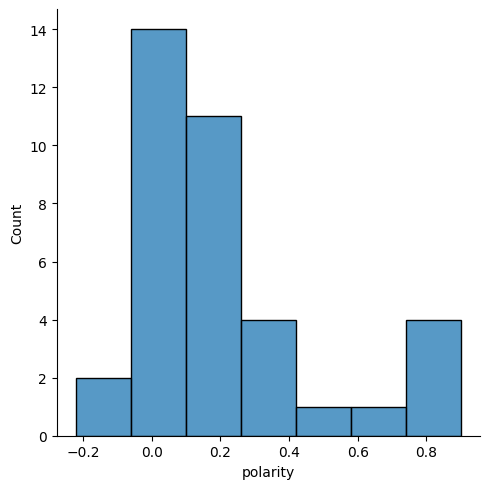

Warren Tweets


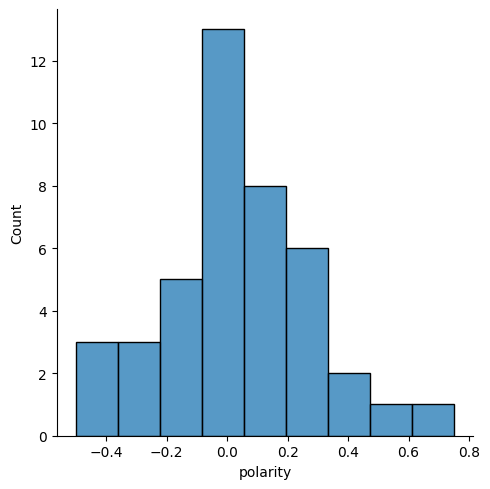

In [37]:
#Two legislators comparison
rubio_tweets = congress_tweets[congress_tweets['name_wikipedia'] == 'Marco Rubio'].copy()
warren_tweets = congress_tweets[congress_tweets['name_wikipedia'] == 'Elizabeth Warren'].copy()

print("Rubio Tweets")
sns.displot(rubio_tweets,         # specify data
            x="polarity") # x-axis label 
plt.show()

print("Warren Tweets")
sns.displot(warren_tweets,         # specify data
            x="polarity") # x-axis label 
plt.show()

Democrat Tweets


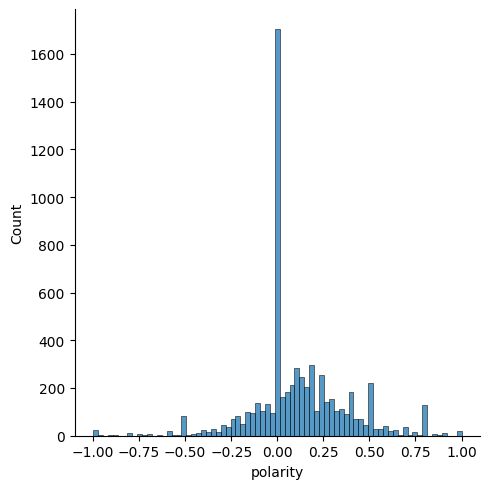

Republican Tweets


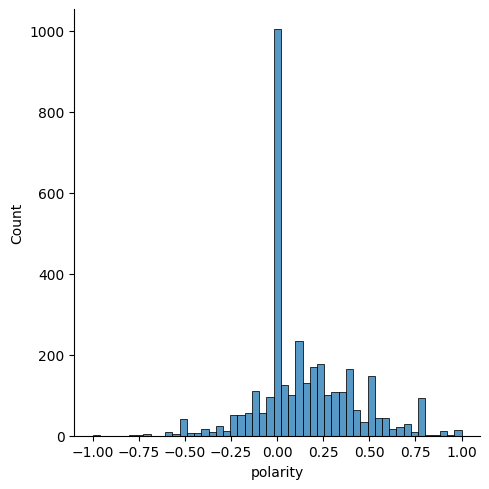

In [38]:
#Democrat vs Republican
demo_tweets = congress_tweets[congress_tweets['party'] == 'Democrat'].copy()
repub_tweets = congress_tweets[congress_tweets['party'] == 'Republican'].copy()

print("Democrat Tweets")
sns.displot(demo_tweets,         # specify data
            x="polarity") # x-axis label 
plt.show()

print("Republican Tweets")
sns.displot(repub_tweets,         # specify data
            x="polarity") # x-axis label 
plt.show()


Senate Tweets


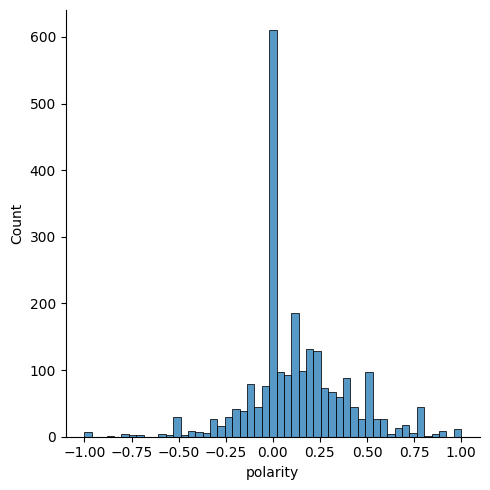

Representative Tweets


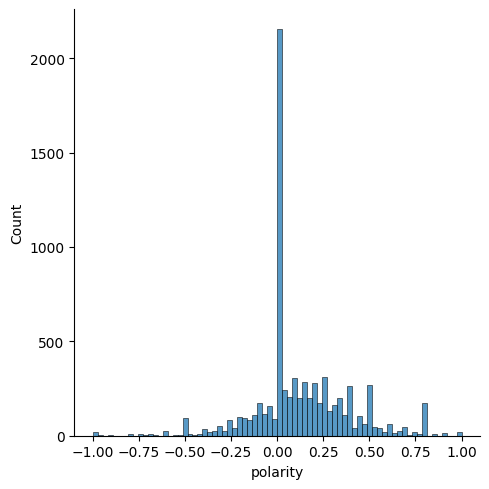

In [39]:
#Senators vs Reps
sen_tweets = congress_tweets[congress_tweets['position'] == 'Sen'].copy()
rep_tweets = congress_tweets[congress_tweets['position'] == 'Rep'].copy()

print("Senate Tweets")
sns.displot(sen_tweets,         # specify data
            x="polarity") # x-axis label 
plt.show()

print("Representative Tweets")
sns.displot(rep_tweets,         # specify data
            x="polarity") # x-axis label 
plt.show()


## Featurization

Before going to classification, explore different featurization techniques. Create three dataframes or arrays to represent your text features, specifically:

* Features engineered from your previous analysis. For example, word counts, sentiment scores, topic model etc.
* A term frequency-inverse document frequency matrix. 
* An embedding-based featurization (like a document averaged word2vec)

In the next section, you will experiment with each of these featurization techniques to see which one produces the best classifications.

In [40]:
#add word counts
congress_tweets['word_count'] = congress_tweets['tokens'].apply(lambda x: len(str(x).split()))
#add subjectivity
congress_tweets['subjectivity'] = congress_tweets['tokens'].map(lambda text: TextBlob(text).sentiment.subjectivity) # iterate over "text" element
#add polarity
congress_tweets['polarity'] = congress_tweets['tokens'].map(lambda text: TextBlob(text).sentiment.polarity)   # iterate over "text" element
congress_tweets.head()

,tweet_id,screen_name,datetime,text,name_wikipedia,position,joined_congress_date,birthday,gender,state,district_number,party,trump_2016_state_share,clinton_2016_state_share,obama_2012_state_share,romney_2012_state_share,tokens,polarity,word_count,subjectivity
511498,1.157790e+18,RepAndyKimNJ,2019-08-03T18:54:32-04:00,Important words worth your time https://twitte...,Andy Kim,Rep,3-Jan-19,7/12/1982,M,NJ,3,Democrat,"1,601,933","2,148,278","2,125,101","1,477,568",Important words worth time RepEscobar Today El...,0.133333,29,0.583333
742985,1.139660e+18,RepCohen,2019-06-14T18:34:28-04:00,"I’ve been a cosponsor of #HR40, originally int...",Steve Cohen,Rep,3-Jan-07,5/24/1949,M,TN,9,Democrat,"1,522,925","870,695","960,709","1,462,330",I cosponsor HR40 originally introduced Rep Joh...,0.187500,48,0.625000
564514,1.149020e+18,RepYvetteClarke,2019-07-10T14:37:53-04:00,🤡 \n\nRESIGN. \n\n#AcostaMustGo http://pbs.tw...,Yvette Clarke,Rep,3-Jan-13,11/21/1964,F,NY,9,Democrat,"2,819,533","4,556,118","4,485,741","2,490,431",🤡 \n\n RESIGN \n\n AcostaMustGo,0.000000,3,0.000000
446623,1.245360e+18,BettyMcCollum04,2020-04-01T10:43:00-04:00,The House passed H.R. 312 last May reaffirming...,Betty McCollum,Rep,3-Jan-01,7/12/1954,F,MN,4,Democrat,"1,322,951","1,367,716","1,546,167","1,320,225",The House passed HR 312 May reaffirming Mashpe...,-1.000000,27,1.000000
181490,1.246130e+18,SenBlumenthal,2020-04-03T13:27:53-04:00,"States &amp; cities are doing what they can, b...",Richard Blumenthal,Sen,3-Jan-11,2/13/1946,M,CT,Senate,Democrat,"673,215","897,572","905,083","634,892",States cities President needs weight governmen...,0.000000,11,0.000000


### Engineered Text Features

In [41]:
# Engineered Features
engineered_features = congress_tweets[['word_count', 
                            'polarity', 
                            'subjectivity']].reset_index(drop = True)

### Bag-of-words or Tf-idf

In [42]:
# Frequency Based featurization
# initialize tf-idf function and set parameters
tf = TfidfVectorizer(tokenizer = rem_punc_stop,  # specify our function for remove punc and stop words
                     token_pattern = None)       # specify "None" to remove warning.

# apply tf-idf vectorizer to our data
tfidf_matrix =  tf.fit_transform(congress_tweets['text'])

# modify the output to be a dense matrix
dense_matrix = tfidf_matrix.todense()

### Word Embedding

In [44]:
# Load Word2Vec model from Google; OPTIONAL depending on your computational resources (the file is ~1 GB)
# Also note that this file path assumes that the word vectors are underneath 'data'; you may wish to point to the CSS course repo and change the path
# or move the vector file to the project repo 

googlenews_word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary = True) 

In [74]:
def document_vector(model, doc):
    doc = [word for word in doc if word in model.index_to_key]
    return numpy.mean(model.__getitem__(doc), axis=0)

# create an array for the size of the corpus
# ----------
# create empty list
empty_list_embeddings_means = []

# loop over each each token
def document_vector(doc):
    doc = [word for word in doc if word in googlenews_word2vec_model.key_to_index] # Remove out-of-vocabulary words
    if not doc:
        return numpy.zeros(googlenews_word2vec_model.vector_size)
    return numpy.mean(googlenews_word2vec_model[doc], axis=0)

# apply the function to precreated tokens
embed_features = numpy.array([document_vector(doc) for doc in congress_tweets['tokens']])

# get the dataframe
word_embedding_df= pd.DataFrame(embed_features)

## Classification

Either use cross-validation or partition your data with training/validation/test sets for this section. Do the following:

* Choose a supervised learning algorithm such as logistic regression, random forest etc. 
* Train six models. For each of the three dataframes you created in the featurization part, train one model to predict whether the author of the tweet is a Democrat or Republican, and a second model to predict whether the author is a Senator or Representative.
* Report the accuracy and other relevant metrics for each of these six models.
* Choose the featurization technique associated with your best model. Combine those text features with non-text features. Train two more models: (1) A supervised learning algorithm that uses just the non-text features and (2) a supervised learning algorithm that combines text and non-text features. Report accuracy and other relevant metrics. 

If time permits, you are encouraged to use hyperparameter tuning or AutoML techniques like TPOT, but are not explicitly required to do so.

In [84]:
#Preprocessing
#get different y's for each outcome in binary form
y_party=congress_tweets['party'].apply(lambda x: 1 if x == 'Democrat' else 0)
y_position=congress_tweets['position'].apply(lambda x: 1 if x == 'Sen' else 0)

### Train Six Models with Just Text

Engineered Features

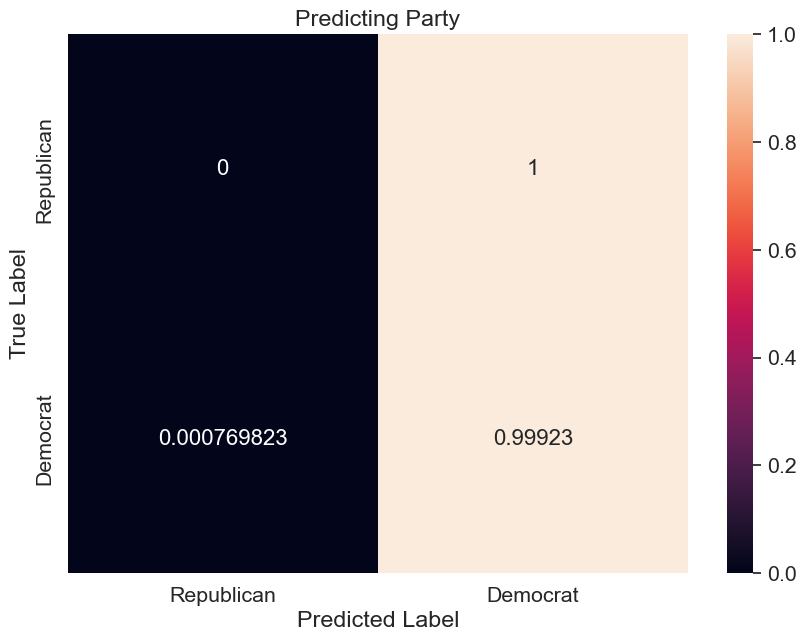

In [53]:
X_train, X_test, y_train, y_test = train_test_split(engineered_features,         # specify features
                                                        y_party,                 # specify labels
                                                        train_size = .80,  # specify train split of 80%
                                                        test_size=0.20,    # specify test split of 20%
                                                        random_state = 10) # set seed for reproducibility

logit_reg = LogisticRegression(max_iter=500)

logit_model = logit_reg.fit(X_train,         # specify feature data
                                y_train.ravel()) # specify label data --- don't forget to ravel the label dataset
y_pred = logit_model.predict(X_test)
    
    # create a confusion matrix
    # ----------
cf_matrix = confusion_matrix(y_test,             # specify test
                                 y_pred,             # specify predicted
                                 normalize = "true") # normalize

    # create a pandas dataframe from the confusion matrix for visualization 
df_cm = pd.DataFrame(cf_matrix,          # specify cf_matrix from which to create dataframe 
                         range(2), range(2)) # set 2 by 2 

    # set confusion matrix indices for clarity of visualization
df_cm = df_cm.rename(index=str, 
                         columns={0: "Republican", 
                                  1: "Democrat"})

    # specify confusion matrix index for clarity
df_cm.index = ["Republican", "Democrat"]
    
 # figure specifications 
plt.figure(figsize = (10,7)) # set figure size specifications
sns.set(font_scale=1.4)      # set label size
sns.heatmap(df_cm,           # specify dataset
                annot=True,    
                annot_kws={"size": 16},
                fmt='g')
    
 # figure labels
plt.title("Predicting Party")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

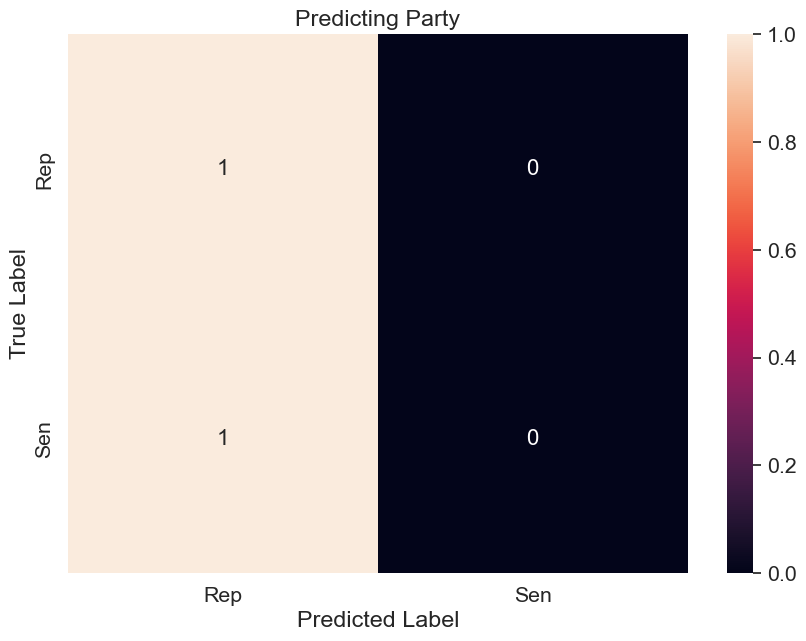

In [79]:
X_train, X_test, y_train, y_test = train_test_split(engineered_features,         # specify features
                                                        y_position,                 # specify labels
                                                        train_size = .80,  # specify train split of 80%
                                                        test_size=0.20,    # specify test split of 20%
                                                        random_state = 10) # set seed for reproducibility

logit_reg = LogisticRegression(max_iter=500)

logit_model = logit_reg.fit(X_train,         # specify feature data
                                y_train.ravel()) # specify label data --- don't forget to ravel the label dataset
y_pred = logit_model.predict(X_test)
    
    # create a confusion matrix
    # ----------
cf_matrix = confusion_matrix(y_test,             # specify test
                                 y_pred,             # specify predicted
                                 normalize = "true") # normalize

    # create a pandas dataframe from the confusion matrix for visualization 
df_cm = pd.DataFrame(cf_matrix,          # specify cf_matrix from which to create dataframe 
                         range(2), range(2)) # set 2 by 2 

    # set confusion matrix indices for clarity of visualization
df_cm = df_cm.rename(index=str, 
                         columns={0: "Rep", 
                                  1: "Sen"})

    # specify confusion matrix index for clarity
df_cm.index = ["Rep", "Sen"]
    
 # figure specifications 
plt.figure(figsize = (10,7)) # set figure size specifications
sns.set(font_scale=1.4)      # set label size
sns.heatmap(df_cm,           # specify dataset
                annot=True,    
                annot_kws={"size": 16},
                fmt='g')
    
 # figure labels
plt.title("Predicting Party")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Tf-idf

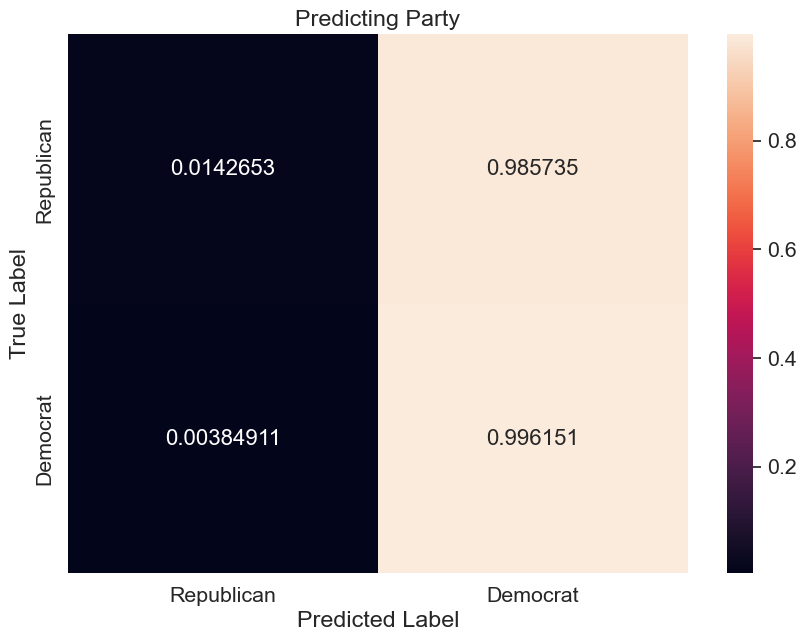

In [76]:
#apparently need array here
tf_array=numpy.array(dense_matrix)

X_train, X_test, y_train, y_test = train_test_split(tf_array,         # specify features
                                                        y_party,                 # specify labels
                                                        train_size = .80,  # specify train split of 80%
                                                        test_size=0.20,    # specify test split of 20%
                                                        random_state = 10) # set seed for reproducibility

logit_reg = LogisticRegression(max_iter=500)

logit_model = logit_reg.fit(X_train,         # specify feature data
                                y_train.ravel()) # specify label data --- don't forget to ravel the label dataset
y_pred = logit_model.predict(X_test)
    
    # create a confusion matrix
    # ----------
cf_matrix = confusion_matrix(y_test,             # specify test
                                 y_pred,             # specify predicted
                                 normalize = "true") # normalize

    # create a pandas dataframe from the confusion matrix for visualization 
df_cm = pd.DataFrame(cf_matrix,          # specify cf_matrix from which to create dataframe 
                         range(2), range(2)) # set 2 by 2 

    # set confusion matrix indices for clarity of visualization
df_cm = df_cm.rename(index=str, 
                         columns={0: "Republican", 
                                  1: "Democrat"})

    # specify confusion matrix index for clarity
df_cm.index = ["Republican", "Democrat"]
    
 # figure specifications 
plt.figure(figsize = (10,7)) # set figure size specifications
sns.set(font_scale=1.4)      # set label size
sns.heatmap(df_cm,           # specify dataset
                annot=True,    
                annot_kws={"size": 16},
                fmt='g')
    
 # figure labels
plt.title("Predicting Party")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

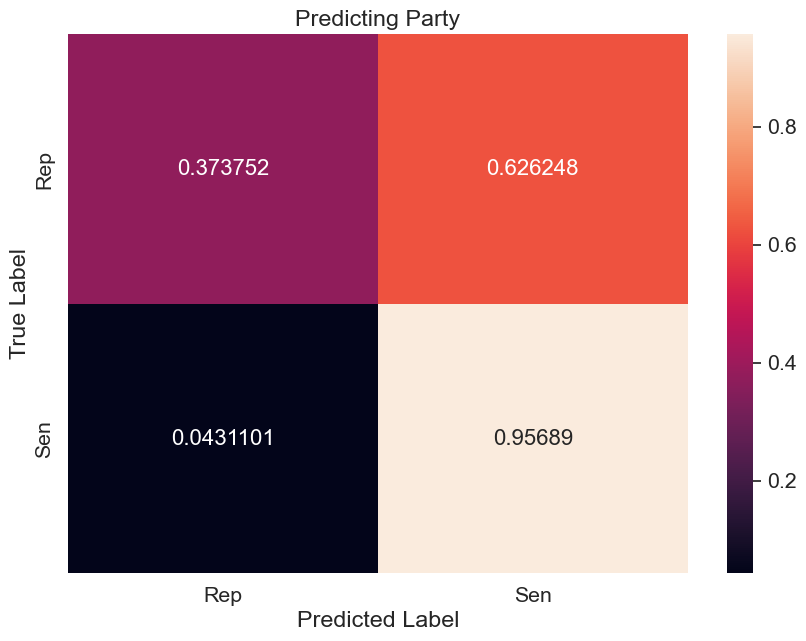

In [81]:
X_train, X_test, y_train, y_test = train_test_split(tf_array,         # specify features
                                                        y_party,                 # specify labels
                                                        train_size = .80,  # specify train split of 80%
                                                        test_size=0.20,    # specify test split of 20%
                                                        random_state = 10) # set seed for reproducibility

logit_reg = LogisticRegression(max_iter=500)

logit_model = logit_reg.fit(X_train,         # specify feature data
                                y_train.ravel()) # specify label data --- don't forget to ravel the label dataset
y_pred = logit_model.predict(X_test)
    
    # create a confusion matrix
    # ----------
cf_matrix = confusion_matrix(y_test,             # specify test
                                 y_pred,             # specify predicted
                                 normalize = "true") # normalize

    # create a pandas dataframe from the confusion matrix for visualization 
df_cm = pd.DataFrame(cf_matrix,          # specify cf_matrix from which to create dataframe 
                         range(2), range(2)) # set 2 by 2 

    # set confusion matrix indices for clarity of visualization
df_cm = df_cm.rename(index=str, 
                         columns={0: "Rep", 
                                  1: "Sen"})

    # specify confusion matrix index for clarity
df_cm.index = ["Rep", "Sen"]
    
 # figure specifications 
plt.figure(figsize = (10,7)) # set figure size specifications
sns.set(font_scale=1.4)      # set label size
sns.heatmap(df_cm,           # specify dataset
                annot=True,    
                annot_kws={"size": 16},
                fmt='g')
    
 # figure labels
plt.title("Predicting Party")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Word Embedding

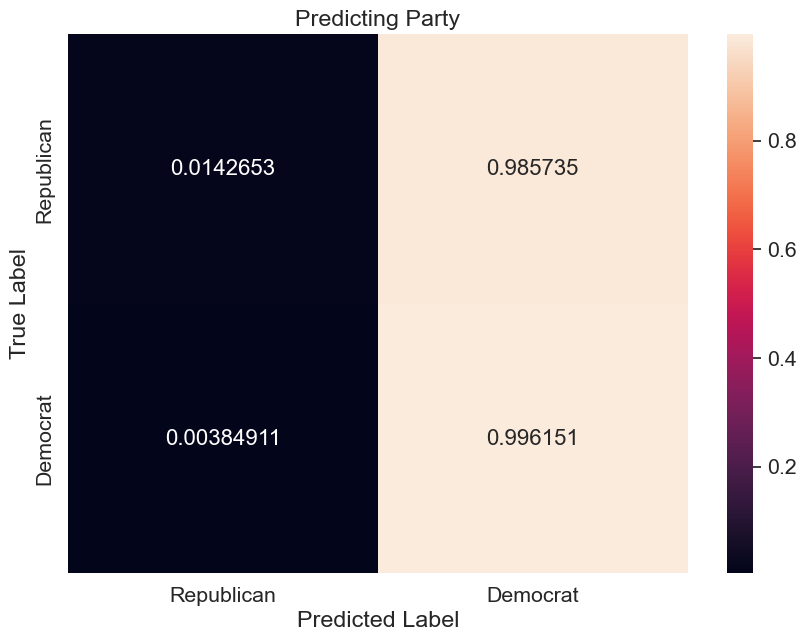

In [82]:
X_train, X_test, y_train, y_test = train_test_split(word_embedding_df,         # specify features
                                                        y_party,                 # specify labels
                                                        train_size = .80,  # specify train split of 80%
                                                        test_size=0.20,    # specify test split of 20%
                                                        random_state = 10) # set seed for reproducibility

logit_reg = LogisticRegression(max_iter=500)

logit_model = logit_reg.fit(X_train,         # specify feature data
                                y_train.ravel()) # specify label data --- don't forget to ravel the label dataset
y_pred = logit_model.predict(X_test)
    
    # create a confusion matrix
    # ----------
cf_matrix = confusion_matrix(y_test,             # specify test
                                 y_pred,             # specify predicted
                                 normalize = "true") # normalize

    # create a pandas dataframe from the confusion matrix for visualization 
df_cm = pd.DataFrame(cf_matrix,          # specify cf_matrix from which to create dataframe 
                         range(2), range(2)) # set 2 by 2 

    # set confusion matrix indices for clarity of visualization
df_cm = df_cm.rename(index=str, 
                         columns={0: "Republican", 
                                  1: "Democrat"})

    # specify confusion matrix index for clarity
df_cm.index = ["Republican", "Democrat"]
    
 # figure specifications 
plt.figure(figsize = (10,7)) # set figure size specifications
sns.set(font_scale=1.4)      # set label size
sns.heatmap(df_cm,           # specify dataset
                annot=True,    
                annot_kws={"size": 16},
                fmt='g')
    
 # figure labels
plt.title("Predicting Party")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

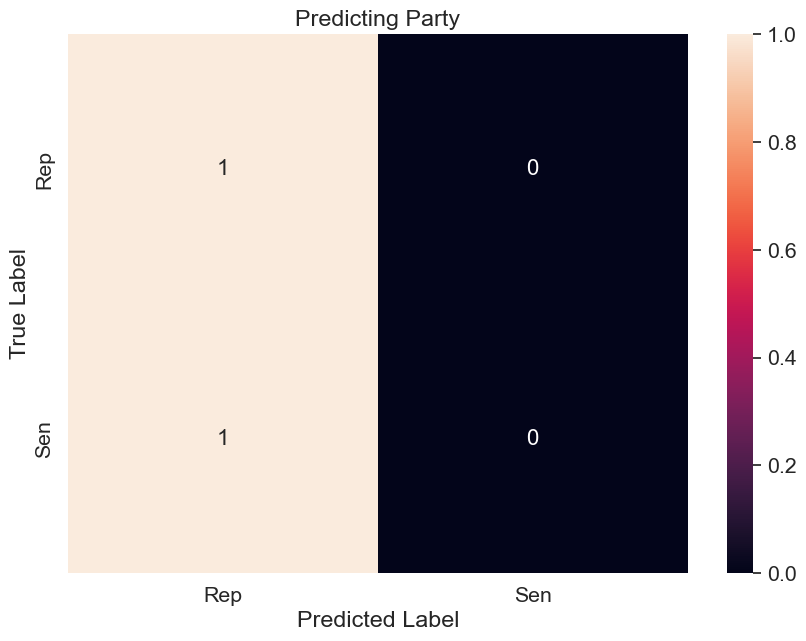

In [83]:
X_train, X_test, y_train, y_test = train_test_split(word_embedding_df,         # specify features
                                                        y_position,                 # specify labels
                                                        train_size = .80,  # specify train split of 80%
                                                        test_size=0.20,    # specify test split of 20%
                                                        random_state = 10) # set seed for reproducibility

logit_reg = LogisticRegression(max_iter=500)

logit_model = logit_reg.fit(X_train,         # specify feature data
                                y_train.ravel()) # specify label data --- don't forget to ravel the label dataset
y_pred = logit_model.predict(X_test)
    
    # create a confusion matrix
    # ----------
cf_matrix = confusion_matrix(y_test,             # specify test
                                 y_pred,             # specify predicted
                                 normalize = "true") # normalize

    # create a pandas dataframe from the confusion matrix for visualization 
df_cm = pd.DataFrame(cf_matrix,          # specify cf_matrix from which to create dataframe 
                         range(2), range(2)) # set 2 by 2 

    # set confusion matrix indices for clarity of visualization
df_cm = df_cm.rename(index=str, 
                         columns={0: "Rep", 
                                  1: "Sen"})

    # specify confusion matrix index for clarity
df_cm.index = ["Rep", "Sen"]
    
 # figure specifications 
plt.figure(figsize = (10,7)) # set figure size specifications
sns.set(font_scale=1.4)      # set label size
sns.heatmap(df_cm,           # specify dataset
                annot=True,    
                annot_kws={"size": 16},
                fmt='g')
    
 # figure labels
plt.title("Predicting Party")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Two Combined Models

In [86]:
#get non text features
other_features= congress_tweets[['joined_congress_date', 
                                     'birthday', 
                                     'gender', 
                                     'state',
                                     'trump_2016_state_share',
                                     'clinton_2016_state_share',
                                     'obama_2012_state_share',
                                     'romney_2012_state_share']]

# get dummies of non-text features
other_features_dummies = pd.get_dummies(other_features).reset_index(drop = True)
other_features_dummies.head()

,joined_congress_date_10-Apr-18,joined_congress_date_10-Jul-18,joined_congress_date_10-Mar-05,joined_congress_date_10-May-94,joined_congress_date_10-Sep-15,joined_congress_date_11-Apr-13,joined_congress_date_11-Dec-07,joined_congress_date_11-Jul-17,joined_congress_date_11-Mar-08,joined_congress_date_12-Apr-18,...,"romney_2012_state_share_634,892","romney_2012_state_share_647,744","romney_2012_state_share_692,634","romney_2012_state_share_710,746","romney_2012_state_share_730,617","romney_2012_state_share_740,600","romney_2012_state_share_754,175","romney_2012_state_share_891,325","romney_2012_state_share_92,698","romney_2012_state_share_971,869"
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


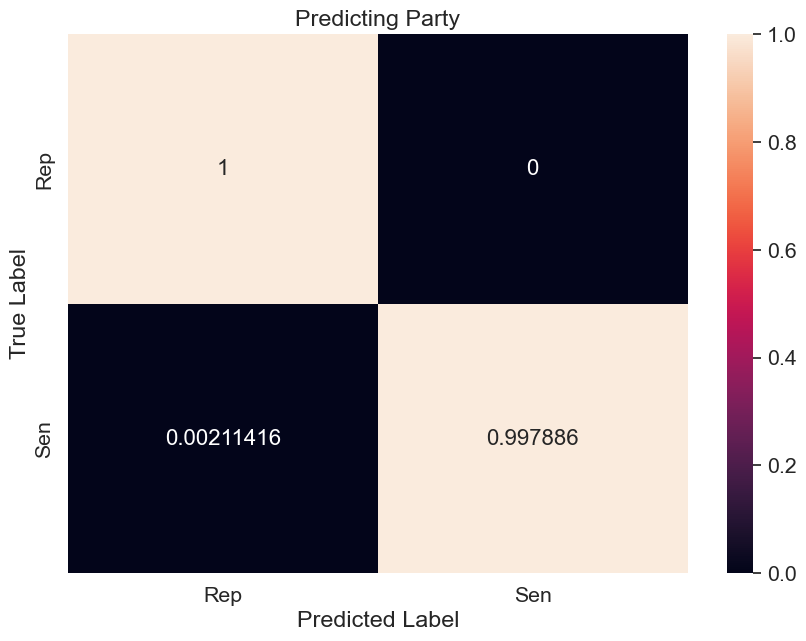

In [91]:
X_train, X_test, y_train, y_test = train_test_split(other_features_dummies,         # specify features
                                                        y_position,                 # specify labels
                                                        train_size = .80,  # specify train split of 80%
                                                        test_size=0.20,    # specify test split of 20%
                                                        random_state = 10) # set seed for reproducibility

logit_reg = LogisticRegression(max_iter=500)

logit_model = logit_reg.fit(X_train,         # specify feature data
                                y_train.ravel()) # specify label data --- don't forget to ravel the label dataset
y_pred = logit_model.predict(X_test)
    
    # create a confusion matrix
    # ----------
cf_matrix = confusion_matrix(y_test,             # specify test
                                 y_pred,             # specify predicted
                                 normalize = "true") # normalize

    # create a pandas dataframe from the confusion matrix for visualization 
df_cm = pd.DataFrame(cf_matrix,          # specify cf_matrix from which to create dataframe 
                         range(2), range(2)) # set 2 by 2 

    # set confusion matrix indices for clarity of visualization
df_cm = df_cm.rename(index=str, 
                         columns={0: "Rep", 
                                  1: "Sen"})

    # specify confusion matrix index for clarity
df_cm.index = ["Rep", "Sen"]
    
 # figure specifications 
plt.figure(figsize = (10,7)) # set figure size specifications
sns.set(font_scale=1.4)      # set label size
sns.heatmap(df_cm,           # specify dataset
                annot=True,    
                annot_kws={"size": 16},
                fmt='g')
    
 # figure labels
plt.title("Predicting Party")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

My models overall didnt appear to perform great - so i'm going with tf-idf and predicting sen vs rep

In [93]:
#have to get df first -using original dense matrix
tf_df = pd.DataFrame(dense_matrix)
#combine data
performs_ok_data=other_features_dummies.join(tf_df)
#check
performs_ok_data.head()
#change all data to strings - code doesnt run otherwise
performs_ok_data.columns=performs_ok_data.columns.astype(str)

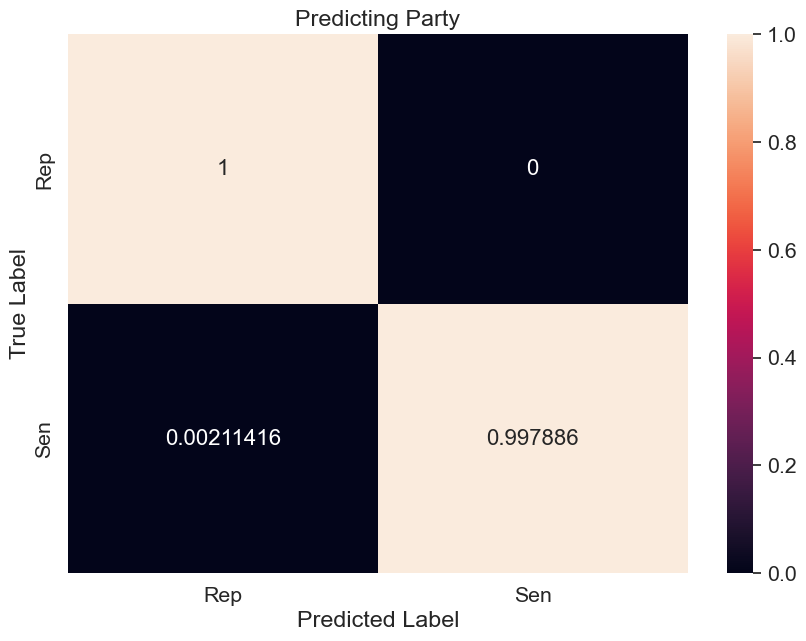

In [94]:
X_train, X_test, y_train, y_test = train_test_split(performs_ok_data,         # specify features
                                                        y_position,                 # specify labels
                                                        train_size = .80,  # specify train split of 80%
                                                        test_size=0.20,    # specify test split of 20%
                                                        random_state = 10) # set seed for reproducibility

logit_reg = LogisticRegression(max_iter=500)

logit_model = logit_reg.fit(X_train,         # specify feature data
                                y_train.ravel()) # specify label data --- don't forget to ravel the label dataset
y_pred = logit_model.predict(X_test)
    
    # create a confusion matrix
    # ----------
cf_matrix = confusion_matrix(y_test,             # specify test
                                 y_pred,             # specify predicted
                                 normalize = "true") # normalize

    # create a pandas dataframe from the confusion matrix for visualization 
df_cm = pd.DataFrame(cf_matrix,          # specify cf_matrix from which to create dataframe 
                         range(2), range(2)) # set 2 by 2 

    # set confusion matrix indices for clarity of visualization
df_cm = df_cm.rename(index=str, 
                         columns={0: "Rep", 
                                  1: "Sen"})

    # specify confusion matrix index for clarity
df_cm.index = ["Rep", "Sen"]
    
 # figure specifications 
plt.figure(figsize = (10,7)) # set figure size specifications
sns.set(font_scale=1.4)      # set label size
sns.heatmap(df_cm,           # specify dataset
                annot=True,    
                annot_kws={"size": 16},
                fmt='g')
    
 # figure labels
plt.title("Predicting Party")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Discussion Questions

1. Why do standard preprocessing techniques need to be further customized to a particular corpus?

Stop words may vary depending on the corpus - tags that lead to links or embedded images in tweets are likely to not be as much of a problem in analyzing a corpus of novels from 18th century Britain. It's important to know the underlying features of your text data to ensure you're appropriately preprocessing and not capturing nuisances in the analyses.

2. Did you find evidence for the idea that Democrats and Republicans have different sentiments in their tweets? What about Senators and Representatives?

I did not notice many specific differences by party or position. I would guess this is because Congress largely has standards of decorum that are adhered to by its general body. Folks like Lauren Boebert, MTG, and Matt Gaetz tend to make the news for being inflammatory (and I'm sure others may comment on AOC and The Squad in the same way), but politician tweets are a curated form of language that are unlikely to represent sentiments the same way that, say, a corpus of tweets from the electorate would.

3. Why is validating your exploratory and unsupervised learning approaches with a supervised learning algorithm valuable?

It's easy to draw inferences from exploratory/unsupervised approaches, so using supervised learning is important to confirm the robustness of said insights. However, it is also important to not just simply proceed with supervised learning algorithms in place of exploratory/unsupervised learning. In the end, it's nice to have these work together as a toolbox; there are some things that a hammer can do that a drill can't, even if the latter is electronically powered. 

4. Did text only, non-text only, or text and non-text features together perform the best? What is the intuition behind combining text and non-text features in a supervised learning algorithm?

The text and text-with-non-text worked the best. There are many ways to process text alone, but in the end, text is just one source of information. Drawing off a wider range of features in building out predictions in an algorithm allows for more comprehensive information that feeds into the prediction.

Here, I'm guessing the text information probably did not add much incremental value to what the non-text-features were able to predict, but the predictions were already so strong from the non-text data that there was limited room to improve. 

Part 9

In [95]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 10.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.3/426.3 kB 7.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.2/346.2 kB 8.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 12.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.4/189.4 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.9/170.9 kB 4.7 MB/s eta 0:00:00a 0:00:01


In [1]:
from transformers import pipeline, set_seed
# Here, 'text-generation' tells the pipeline to create a text generation model, and model='gpt2' 
# specifies that you want to use the GPT-2 model for this task.
generator = pipeline('text-generation', model='gpt2') 

set_seed(100)
input_text = "I am completing a project to predict party affiliation and Senator or Representative status from Congressional tweets"
# specifying the maximum length of the output, and the number of different sequences you want
output = generator(input_text, max_length=100, num_return_sequences=5) 
for result in output:
    print(result['generated_text'])
    print("----")

/Users/alexadia/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


: 

: 

this crashes my computer but I uploaded to colab and got this: 

I am completing a project to predict party affiliation and Senator or Representative status from Congressional tweets.

I work on a project to provide information and to provide suggestions to our campaign staff.
----
I am completing a project to predict party affiliation and Senator or Representative status from Congressional tweets. There are no rules on this. — Donald J. Trump (@realDonaldTrump) May 24, 2017

@foxandfriends It's fine with me to play my part, because if you're doing your homework — Donald J. Trump (@realDonaldTrump) May 24, 2017

My friends, what a wonderful thought, but this is the first time I say "thank you" to a political observer for not
----
I am completing a project to predict party affiliation and Senator or Representative status from Congressional tweets. I'm using the data to predict the final total number of votes, but the polls don't have the data to support that prediction, so I can't comment on that."

To see all the details of the Senate polls or the Senate election results please click here.
----
I am completing a project to predict party affiliation and Senator or Representative status from Congressional tweets. I will be asking other social media users to create my own account in my name by posting all the tweets I have posted or other messages I receive from them. In the process, I will check my emails with my Twitter, and I will add it onto my social media account. If I don't see that email, I will start the message, and you will have time to reply. This is the best
----
I am completing a project to predict party affiliation and Senator or Representative status from Congressional tweets.


I am completing a project to predict the number of votes for any candidate in any political district based on data collected by the National Electorate of Representatives (NEAP), a program which monitors and monitors electoral process as well as other areas of politics and political activities.


I am completing a project to predict the percentage of those who say their candidate is an Independent in a local or district election.


----

See here for proof: https://colab.research.google.com/drive/1_t-QT9u-_oggRSAWSUrfgWAxoYHzIxXf?usp=sharing